In [1]:
from DateRanges import *
import FixedIncomeAnalysisClass as FI
import matplotlib.pyplot as plt
import pandas as pd

Creating the dataframe

In [2]:
df = pd.read_csv("Data/TreasuryData/merged_cleaned_treasury_data.csv")
df.Date = pd.to_datetime(df.Date)
df.index = df.Date
df = df.drop(columns = ["Unnamed: 0", "Date"])
df

,GT 10 GOVT 11_15_34 Close,GT 5 GOVT 10_31_29 Close,GT 30 GOVT 11_15_54 Close,GB 06 GOVT 05_08_25 Close
Date,,,,
1991-03-15,8.094,7.715,8.288,6.087
1991-03-18,8.144,7.788,8.332,6.118
1991-03-19,8.234,7.909,8.403,6.199
1991-03-20,8.167,7.851,8.343,6.177
1991-03-21,8.139,7.804,8.329,6.144
...,...,...,...,...
2024-11-05,4.273,4.150,4.436,4.418
2024-11-06,4.433,4.275,4.612,4.437
2024-11-07,4.328,4.172,4.531,4.416


In [3]:
for year in e_year_ranges:
    start_date, end_date = e_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]

    print(new_df.std())
    
    """
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.show()"""
    

GT 10 GOVT 11_15_34 Close    0.356075
GT 5 GOVT 10_31_29 Close     0.472364
GT 30 GOVT 11_15_54 Close    0.205153
GB 06 GOVT 05_08_25 Close    0.331144
dtype: float64
GT 10 GOVT 11_15_34 Close    0.209281
GT 5 GOVT 10_31_29 Close     0.219640
GT 30 GOVT 11_15_54 Close    0.168664
GB 06 GOVT 05_08_25 Close    0.102513
dtype: float64
GT 10 GOVT 11_15_34 Close    0.228657
GT 5 GOVT 10_31_29 Close     0.287855
GT 30 GOVT 11_15_54 Close    0.135144
GB 06 GOVT 05_08_25 Close    0.073686
dtype: float64
GT 10 GOVT 11_15_34 Close    0.271168
GT 5 GOVT 10_31_29 Close     0.242426
GT 30 GOVT 11_15_54 Close    0.236270
GB 06 GOVT 05_08_25 Close    0.255703
dtype: float64
GT 10 GOVT 11_15_34 Close    0.176653
GT 5 GOVT 10_31_29 Close     0.332098
GT 30 GOVT 11_15_54 Close    0.210555
GB 06 GOVT 05_08_25 Close    0.435210
dtype: float64
GT 10 GOVT 11_15_34 Close    0.107117
GT 5 GOVT 10_31_29 Close     0.060332
GT 30 GOVT 11_15_54 Close    0.137393
GB 06 GOVT 05_08_25 Close    0.008395
dtype: float6

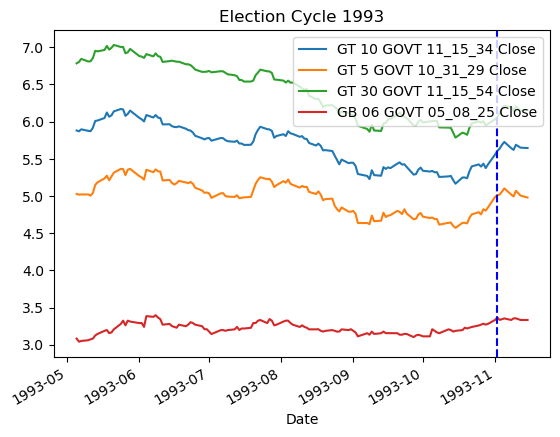

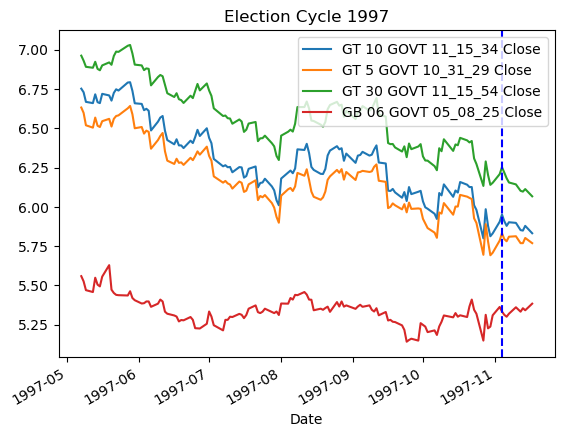

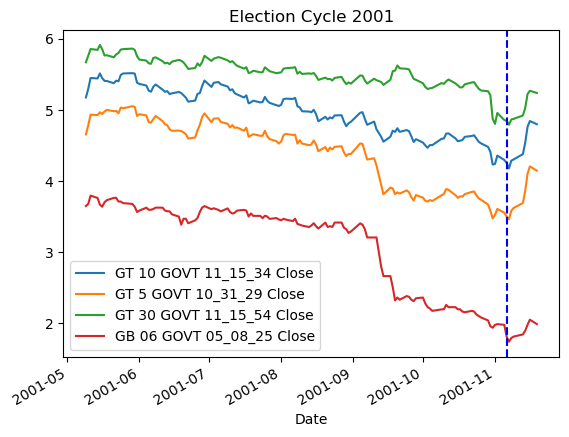

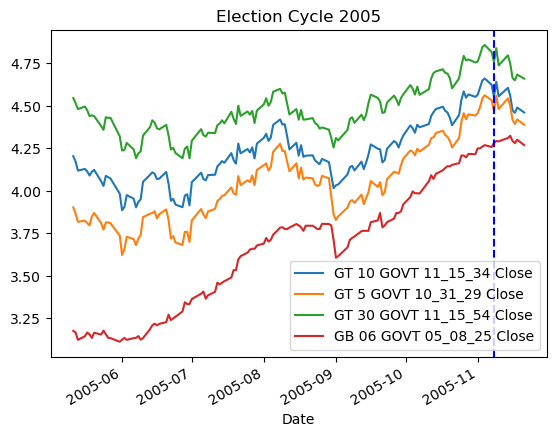

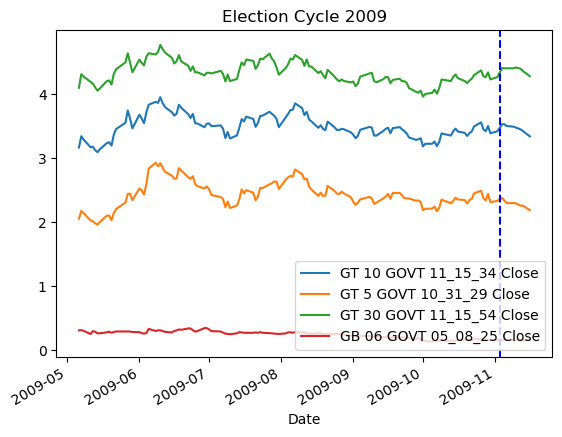

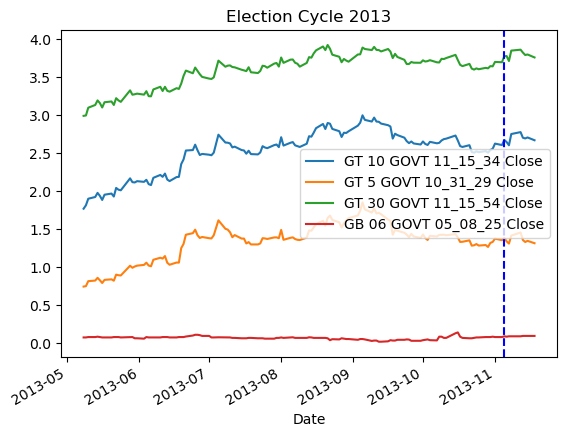

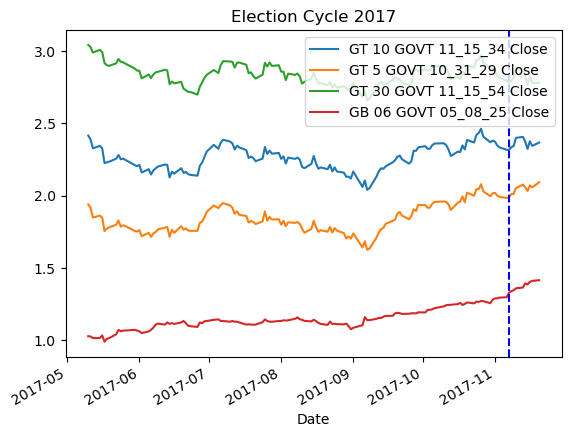

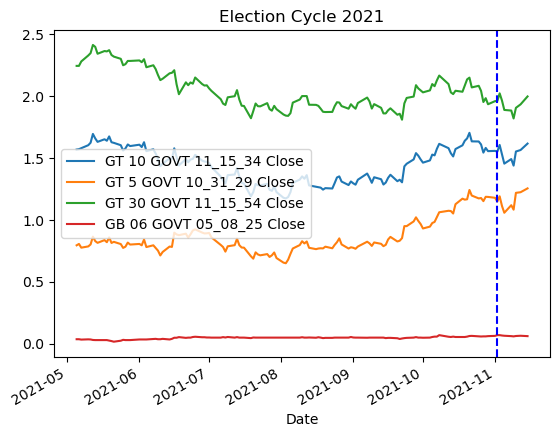

In [ ]:
for year in e_year_ranges:
    start_date, end_date = ne_1_year_ranges[year]
    new_df = df[ (df.index > start_date) & (df.index < end_date)]
    
    new_df.plot()
    plt.title("Election Cycle " + year)
    plt.axvline(election_day(int(year)), color = "b", linestyle = "--")
    plt.show()

In [5]:
T_at_start = FI.Treasuries(df["GT 10 GOVT 11_15_34 Close"][0], 10, issue_date=df.index[0])

/var/folders/49/1jq9sd950fg6397s7sm972380000gn/T/ipykernel_28508/3058725032.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  T_at_start = FI.Treasuries(df["GT 10 GOVT 11_15_34 Close"][0], 10, issue_date=df.index[0])


In [6]:
T_at_start.cash_flow_dates

0    1991-09-13
1    1992-03-13
2    1992-09-11
3    1993-03-12
4    1993-09-10
5    1994-03-11
6    1994-09-09
7    1995-03-10
8    1995-09-08
9    1996-03-08
10   1996-09-06
11   1997-03-07
12   1997-09-05
13   1998-03-06
14   1998-09-04
15   1999-03-05
16   1999-09-03
17   2000-03-03
18   2000-09-01
19   2001-03-02
dtype: datetime64[ns]

In [7]:
print(df.apply(lambda x : T_at_start.new_price(current_date=x.name, ytm=x["GT 10 GOVT 11_15_34 Close"]), axis=1))

             0    1    2    3    4     5     6     7     8     9     10    11  \
Date                                                                            
1991-03-15  182  364  546  728  910  1092  1274  1456  1638  1820  2002  2184   
1991-03-18  179  361  543  725  907  1089  1271  1453  1635  1817  1999  2181   
1991-03-19  178  360  542  724  906  1088  1270  1452  1634  1816  1998  2180   
1991-03-20  177  359  541  723  905  1087  1269  1451  1633  1815  1997  2179   
1991-03-21  176  358  540  722  904  1086  1268  1450  1632  1814  1996  2178   
...         ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...   ...   
2024-11-05    0    0    0    0    0     0     0     0     0     0     0     0   
2024-11-06    0    0    0    0    0     0     0     0     0     0     0     0   
2024-11-07    0    0    0    0    0     0     0     0     0     0     0     0   
2024-11-08    0    0    0    0    0     0     0     0     0     0     0     0   
2024-11-12    0    0    0   

In [8]:
T_at_start.new_price(df.iloc[-1, 0],df.index[-1])

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
dtype: int64